Ваша задача предсказать пользователям из тестового набора рестораны в неродных городах, которым они поставят в следующую поездку оценку 4 и выше. Метрика качества MNAP@100

Вам даны файлы: users.csv - user_id, city - родной город пользователя. ссылка - https://disk.yandex.ru/d/lNiMbpoV5-T5KA

organisations.csv - описание организаций. ссылка - https://disk.yandex.ru/d/tDNxgvX53PHZfw org_id, city, features_id - категориальный фичи организации, rubrics_id - рубрики к которым относится заведение, average_bill - средний чек, rating - рейтинг из Яндекс.Карт

reviews.csv - оценки пользователей user_id, org_id, rating - оценка пользователя, ts - время оценки(в днях) ссылка - https://disk.yandex.ru/d/VG4kuAXREyO_qQ

test_users.csv - набор пользователей для которых нужно сделать предсказание. ссылка - https://disk.yandex.ru/d/ansmaSIQaaSrFA



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
preds = pd.read_csv('preds.csv', index_col=0)
preds.head()

,user_id,target
0,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,['C2AE4BCB94B29AED5173A9EDF17ED6860A9186074266...
1,9688158E01F868BE92268B8593F0E9EA72FDCA9BFE8A1D...,['B2AE4BCB94B29AED5173A9EDF17ED6860A9186074266...
2,DB2EFA8E5E2E3D52E4EF9F83E66380FEA53B1CBC279C6F...,['B2AE4BCB94B29AED5173A9EDF17ED6860A9186074266...
3,8D8CE1CB135B68CDA3B6511E37F0548B5143CC63DAFE45...,['B2AE4BCB94B29AED5173A9EDF17ED6860A9186074266...
4,07A29DB7E769E1E755580BB260D1A8939996D16A61A542...,['B2AE4BCB94B29AED5173A9EDF17ED6860A9186074266...


In [ ]:
preds.target[0]

"['C2AE4BCB94B29AED5173A9EDF17ED6860A91860742669F8122350C0DEFA275A9', 'BEC4C29F7D00A422AB5ECA6EDB08A38EF31811AC6C89C30A9FEED33C6344D46A', '0AE00E242B2D160A62C7958632185FF049C11FE477A5202B517C559EDB5C0A27', '2222B053F2FD204B6223381E5AC0BFA93243A77EBB80671858B09CEBEDB90449', '4A346E8DEC029AC3376391478830DA2C6AAADB5D75B30C98FE9A0CA53453D8DC', 'A60AAC5B4CC458FED781C38174A04179C175CEA4290FA0B02F10EC8787AE9669', '251976D5DB8BE06C8E145F2AB2AB7891F49DFD186FD163BCDE008FC3ABF32CA6', '2C6A21920D8D5C1A54102E1A141EBF98603D4918C31808F4EB1D99D98BEDEFFE', 'AEBD7336C89D88B3906C0C98FC079255491B2FA8182D68C5C8F5B44C9A898450', '609C03AB604F869BCA7253A7DFE1693977E96711757DA64DBB465C43F0FC5E75', 'E42E3FA1EB15BB6C2AD755A23B13B2ABAD731626EFD973D06128E8B8F11252AC', '6E5509F9E6D206348A697744B13E9D090A4DFEFA3D81273FD2EA33374CFBF5B0', '266B767CB70B156D266007ACE6EBA271FD953D6D23061CF76EC60A02873B796C', '6F704A4D538E6FF1C710287575672222A09026F6F8EE656DD67E092F4E7C1963', '95AB0F18D6BE5B43212EFACC8491E18B2B7EE43DEB97B

In [ ]:
# 66346 организаций
organisations = pd.read_csv('organisations.csv')
organisations.head()

,org_id,city,average_bill,rating,rubrics_id,features_id
0,DB02713EAD474F7DCB4FAB65333D4D360C6337BFC3CA43...,msk,500.0,4.378378,30771,1509 10462 11617 273469383 1082283206 1018 152...
1,31F077980B0BCC05B17B988E0017B538CE523A2ACB8FEA...,msk,500.0,4.166667,30519,1524 10462 11177 11629 1018 11704 1415 11867 2...
2,B16CB024197B053E9C713A79812ED658CA4B2FB8F5293C...,msk,500.0,3.687500,30776 30771,1524 11629 1018 11704 10462 12048 1416 246 204...
3,25308E05A46D9D40BDB6A6AC55CD422147D40B0B0D44B2...,msk,500.0,3.835417,30771,10462 3501744275 3501513153 20424 3501618484 2...
4,D9FB72E2B38AC2A03586074A0019ABA16F7EE761C08120...,msk,500.0,4.750000,3501750896,20282 20424 273469383 11617 11629 11177 10462 ...


In [ ]:
organisations.shape

(66346, 6)

In [ ]:

organisations  = pd.concat([organisations,organisations.rubrics_id.str.get_dummies(sep = " ")], axis =1)


In [ ]:
organisations  = pd.concat([organisations,organisations.features_id.str.get_dummies(sep = " ")], axis =1)


In [ ]:
organisations.head()

,org_id,city,average_bill,rating,rubrics_id,features_id,30519,30770,30771,30774,...,948581684,956,956707375,962,976365376,976365377,980,983,989,995
0,DB02713EAD474F7DCB4FAB65333D4D360C6337BFC3CA43...,msk,500.0,4.378378,30771,1509 10462 11617 273469383 1082283206 1018 152...,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,31F077980B0BCC05B17B988E0017B538CE523A2ACB8FEA...,msk,500.0,4.166667,30519,1524 10462 11177 11629 1018 11704 1415 11867 2...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,B16CB024197B053E9C713A79812ED658CA4B2FB8F5293C...,msk,500.0,3.687500,30776 30771,1524 11629 1018 11704 10462 12048 1416 246 204...,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,25308E05A46D9D40BDB6A6AC55CD422147D40B0B0D44B2...,msk,500.0,3.835417,30771,10462 3501744275 3501513153 20424 3501618484 2...,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,D9FB72E2B38AC2A03586074A0019ABA16F7EE761C08120...,msk,500.0,4.750000,3501750896,20282 20424 273469383 11617 11629 11177 10462 ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
organisations.groupby(by='city').count()

,org_id,average_bill,rating,rubrics_id,features_id,30519,30770,30771,30774,30775,...,948581684,956,956707375,962,976365376,976365377,980,983,989,995
city,,,,,,,,,,,,,,,,,,,,,
msk,44159,20680,35286,44159,35419,44159,44159,44159,44159,44159,...,44159,44159,44159,44159,44159,44159,44159,44159,44159,44159
spb,22187,11017,18009,22187,17703,22187,22187,22187,22187,22187,...,22187,22187,22187,22187,22187,22187,22187,22187,22187,22187


In [ ]:
msk = organisations[organisations.city == 'msk']
spb = organisations[organisations.city == 'spb']

In [ ]:
# 2912039
reviews = pd.read_csv('reviews.csv', index_col=0)
reviews = reviews.reset_index()
reviews = reviews.drop(columns='index')
reviews.head()

,org_id,user_id,rating,ts
0,689F4C0B84691F6FC69368EDF6E426BEAC543C799F56F2...,E5A7AF2BBA62183E969998FFE09A6304F4761BC7445EF8...,5.0,618
1,01074FAE0B11E5A1B74AC2D82CF0B66F2A766C84856B0D...,26B8CB030A2B279E6804AC6EF20C27D7F7BE0C08129C78...,5.0,525
2,A9B175ABD408F9C22A1E5DBE40FA1E12A19AB0DB632555...,A563C39DB5FE7418D9A6DFE2B412B5D56D94354F57A249...,3.0,992
3,EB920597A31D5A076FE047DEA1B1B5270C2C69A2D4E1FB...,C3EBA3C3B06DF6D4660FA05F89E6FDC9064AEE854E0F42...,1.0,743
4,61CA13C754EE92C2CAEA47987DEC07889AFD53C52753D6...,31F3248779160242FDF7382C945F296F236762E53930BB...,4.0,629


In [ ]:
reviews.shape

(2912039, 4)

In [ ]:
users = pd.read_csv('users.csv')
users

,user_id,city
0,36BF53FF2D117FD6B70F11C1C2D2DD88609298CBF80A11...,msk
1,37C79862F940ED4A451304697F61E652FE120C868BBCD5...,msk
2,40279525A675CB54040C01C09A5AEE02794B187E24C204...,msk
3,40DD4DBAEFF1376F92DA3E08D36E3E81A2539228389143...,msk
4,FB01CDD7C500F53CB666EA7B182A5BB940271FCC9BF039...,msk
...,...,...
1250989,05C95BF89AA9C76A88FBFDFB2C6B12AF0BAADA04FCA4DF...,spb
1250990,8611BB606859BC25B970F6F9006BD9BBFC292AD7B87DEB...,spb
1250991,1ED18945B15D85CE31E456CF877EB7DDA1113B10159DF8...,spb
1250992,C2AA4B6B960B0F5BACCD7AA527D6241A6F4F49BD4E5CC9...,spb


In [ ]:
users.shape

(1250994, 2)

In [ ]:
users.groupby(by='city').count()

,user_id
city,
msk,910384
spb,340610


In [ ]:
test_users = pd.read_csv('test_users.csv', index_col=0)
test_users.head()

,user_id
0,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...
1,9688158E01F868BE92268B8593F0E9EA72FDCA9BFE8A1D...
2,DB2EFA8E5E2E3D52E4EF9F83E66380FEA53B1CBC279C6F...
3,8D8CE1CB135B68CDA3B6511E37F0548B5143CC63DAFE45...
4,07A29DB7E769E1E755580BB260D1A8939996D16A61A542...


In [ ]:
users[users['user_id'].isin (test_users.user_id)].groupby(by='city').count()

,user_id
city,
msk,795
spb,205


In [ ]:
organisations.isna().sum()

org_id              0
city                0
average_bill    34649
rating          13051
rubrics_id          0
                ...  
976365377           0
980                 0
983                 0
989                 0
995                 0
Length: 970, dtype: int64

In [ ]:
users_interactions_count_df = (
     reviews
    .groupby(['org_id', 'user_id'])
    .last()
    .reset_index()
    .groupby('user_id').size())
print('# users:', len(users_interactions_count_df))

users_with_enough_interactions_df = \
    users_interactions_count_df[users_interactions_count_df >= 1].reset_index()[['user_id']]
print('# users with at least 5 interactions:',len(users_with_enough_interactions_df))


# users: 1040537
# users with at least 5 interactions: 1040537


In [ ]:
users_interactions_count_df

user_id
000022DD595986F89E708E98E0D0575FDF349287F07A243D7CEA5127010DF41D    2
000030C32743B19A1D3A2A4B86D62D2F2E587020428404D9BDE3BCCB56440CFF    1
0000543D33DCB061EE8B5990BC5C69BB4BF9573D2871B3D63947007A637F33CA    1
000074A8F17EFCF73E02458FBEF9FA80A99245992F14377714DCFC3137718EB8    1
0000761E8FC5EAAE76EB6B554B5D3CCB6EBDF4ACD3AD22F1815A2BE1E6324FB5    1
                                                                   ..
FFFFA48617D77EAFB26FF41FCC2BF626ACCAD2A5B2DCD3E9F056063A6FBD77DA    1
FFFFCCD2322C103BC1E7EE8AF8C5CBC9E2C2987CBC0D6D1C111CC82538323371    2
FFFFD5BC9375D992BF5BA5087ECB751B3D602C2F65C78051DED1445D4BC48F72    1
FFFFF2ECA503BB1D8FC8556BBDE8DB00C26B5D629656A1527BC466EC72AE6341    2
FFFFFC193AA1C9DF1F84B7352FE61BAEE90C52B28E8DBDFE3B2683700654484E    5
Length: 1040537, dtype: int64

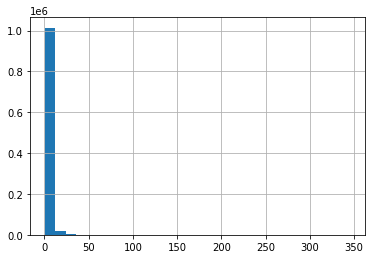

In [ ]:
users_interactions_count_df.hist(bins=30)

In [ ]:
interactions_from_selected_users_df = reviews[reviews.user_id.isin(users_with_enough_interactions_df.user_id)]

In [ ]:

#def smooth_user_preference(x):
#    return math.log(1+x, 2)

interactions_full_df = (
    interactions_from_selected_users_df
     #reviews
    .groupby(['user_id', 'org_id'])
    .agg({'rating':'mean'})
    .reset_index().set_index(['user_id', 'org_id'])
)
interactions_full_df['ts'] = (
    interactions_from_selected_users_df
    #reviews
    .groupby(['user_id', 'org_id'])['ts'].last()
)

interactions_full_df = interactions_full_df.reset_index()
interactions_full_df.head(20)


,user_id,org_id,rating,ts
0,000022DD595986F89E708E98E0D0575FDF349287F07A24...,4731B1300AD3EA33890F2204A201AB6B5557BBCD753C0A...,5.0,423
1,000022DD595986F89E708E98E0D0575FDF349287F07A24...,DBC33D6353CA40B8C808DEE67209DED876E9C9D91C7CB0...,5.0,158
2,000030C32743B19A1D3A2A4B86D62D2F2E587020428404...,20FE8B1DCE7D1F339C85336673C7FE5573281EDB99B953...,5.0,826
3,0000543D33DCB061EE8B5990BC5C69BB4BF9573D2871B3...,BCB55DA1456514E30416C49398094B692D5074EF044FEF...,5.0,215
4,000074A8F17EFCF73E02458FBEF9FA80A99245992F1437...,CF441309516ECF56C0FEA969A136E5A3FAFC306BA8F8C5...,5.0,914
5,0000761E8FC5EAAE76EB6B554B5D3CCB6EBDF4ACD3AD22...,08CE55A6AB8E9C59CF6BCDD3FD48DF7E94B1F8EC48676E...,5.0,787
6,000078A586AA2F4E9BB32E482BC2A541B27C511A1E0E6E...,37372AAA9995FCC113A68B6B6C16A6F18426A1E15E68E7...,5.0,744
7,000078A586AA2F4E9BB32E482BC2A541B27C511A1E0E6E...,9BC63A7BB7E3EC294BA55737D3BAE041A9D52E9DB1E2A5...,5.0,605
8,00007F873FFDDC6A2E70D475572A44A92CD6394C25825F...,3055000E7E1B72FA325E19AC5BA41412B514D5CDB9B8FA...,5.0,674
9,00007F873FFDDC6A2E70D475572A44A92CD6394C25825F...,D57621A0C855FF7055B5D3CC690FA41850CBF001A7DD8D...,5.0,674


In [ ]:
interactions_full_df.shape

(163033, 4)

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving organisations.csv to organisations.csv
Saving preds.csv to preds.csv
Saving reviews.csv to reviews.csv
Saving test_users.csv to test_users.csv
Saving users.csv to users.csv


In [ ]:
uploaded = files.upload()

Saving users.csv to users.csv


In [ ]:
uploaded = files.upload()

Saving organisations.csv to organisations.csv


In [ ]:
split_ts = 900
interactions_train_df = interactions_full_df.loc[interactions_full_df.ts < split_ts].copy()
interactions_test_df = interactions_full_df.loc[interactions_full_df.ts >= split_ts].copy()

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

interactions_train_df


# interactions on Train set: 2565308
# interactions on Test set: 292616


,user_id,org_id,rating,ts
0,000022DD595986F89E708E98E0D0575FDF349287F07A24...,4731B1300AD3EA33890F2204A201AB6B5557BBCD753C0A...,5.0,423
1,000022DD595986F89E708E98E0D0575FDF349287F07A24...,DBC33D6353CA40B8C808DEE67209DED876E9C9D91C7CB0...,5.0,158
2,000030C32743B19A1D3A2A4B86D62D2F2E587020428404...,20FE8B1DCE7D1F339C85336673C7FE5573281EDB99B953...,5.0,826
3,0000543D33DCB061EE8B5990BC5C69BB4BF9573D2871B3...,BCB55DA1456514E30416C49398094B692D5074EF044FEF...,5.0,215
5,0000761E8FC5EAAE76EB6B554B5D3CCB6EBDF4ACD3AD22...,08CE55A6AB8E9C59CF6BCDD3FD48DF7E94B1F8EC48676E...,5.0,787
...,...,...,...,...
2857916,FFFFD5BC9375D992BF5BA5087ECB751B3D602C2F65C780...,CA82ACDEA81116D953FD148CECF5A3EC51DCF1B58C6B45...,2.0,511
2857917,FFFFF2ECA503BB1D8FC8556BBDE8DB00C26B5D629656A1...,676EBBDA1D436FC7487B45F384A8BD06F53EF96435D3CD...,5.0,489
2857918,FFFFF2ECA503BB1D8FC8556BBDE8DB00C26B5D629656A1...,882556ADCB596D81F6A13DEF35B756F2890BCF12F1D294...,5.0,489
2857921,FFFFFC193AA1C9DF1F84B7352FE61BAEE90C52B28E8DBD...,82FAD26175757EE34A7C3E468897F66341B6679431BFD4...,3.0,730


In [ ]:
interactions = (
    interactions_train_df
    .groupby('user_id')['org_id'].agg(lambda x: list(x))
    .reset_index()
    .rename(columns={'org_id': 'true_train'})
    .set_index('user_id')
)

interactions['true_test'] = (
    interactions_test_df
    .groupby('user_id')['org_id'].agg(lambda x: list(x))
)

# заполнение пропусков пустыми списками
interactions.loc[pd.isnull(interactions.true_test), 'true_test'] = [
    [''] for x in range(len(interactions.loc[pd.isnull(interactions.true_test), 'true_test']))]

interactions.head(1)


,true_train,true_test
user_id,,
0005F8C0E80414C83B0B439D460DBA89CD337AA5E8789DD20159A632F33F4FE1,[134C8D44B2B6BA55BBB3D6F0AA05F5F24D4D8D64544FD...,[0B9CEC8FCA8F556FA3EF537B93EBA6BB1CC58AB0B2ABC...


In [ ]:
interactions.true_test

user_id
0010243BED6D8BA061BE044DB77B6F71416214C6381DF0AD0EA528DF7DCAA9ED                                                     
0012AA842311546E444CF9F44DF6FE9EECBEE22C521EFA6C66E13BEF87992D1A    [005E52F7163BD50E2A25BC4DE16782764BC00B6DC20A0...
003DC7B6C04304E766450C7B1938408451BBF54B705180552320CE89FD5B197E    [EA44D5215BBA091E3B393DE5ED07D22D8A18D8662BEAD...
006BD2631C0195C6D99AC4124816EE354938583DD2ECA125A3BF5C62C96F9297    [116E25C71AEEC6FE6FC2A78C0A19AA8D99FA29DF25985...
008A5555A758AFD4BAAA10A3BFC54638BA469081E584270F96372B34AD33EA90    [01F97B77FBD1AD3E0BA4D141A7FC151187E7FA046209C...
                                                                                          ...                        
FF8CE03262ECC543C17EE04D06DC94B57FA596FFF0835F9B272621C15074D692                                                     
FFB28171F82AA1640FB2E89B643429B7387BBD1DA340E2932F79C4F674CEB745    [03A351B6BAE5B4754674BD40EA6C40BF60955EFB792BA...
FFD7D6195D1E8E7269E55B55A9D79C568497FE2820A0832F

In [ ]:
sum(interactions.true_test=='')

763845

In [ ]:
interactions_train_df

,user_id,org_id,rating,ts
1,0005F8C0E80414C83B0B439D460DBA89CD337AA5E8789D...,134C8D44B2B6BA55BBB3D6F0AA05F5F24D4D8D64544FDB...,5.0,329
2,0005F8C0E80414C83B0B439D460DBA89CD337AA5E8789D...,1D54B0976DF9E1812DF53CD268D7BE35342DC3AE43083E...,1.0,624
4,0005F8C0E80414C83B0B439D460DBA89CD337AA5E8789D...,2EBDD7DD1C3F8E03C59045FF7C95DAE9D3658DBC6DC4AC...,5.0,465
5,0005F8C0E80414C83B0B439D460DBA89CD337AA5E8789D...,3522AC26C0AE326E6E572828673AD4C99B8E944478CD4A...,5.0,349
6,0005F8C0E80414C83B0B439D460DBA89CD337AA5E8789D...,3CA8F5BB29162F5320864E680A26D4C705675760635BEF...,4.0,394
...,...,...,...,...
311681,FFEC4A731CA88F9207EC16F9D3FB7015E941D1ED19D226...,F6C52CAC0E8841CC3FBC5808ECEB956A73BF86C7F32381...,5.0,281
311685,FFED73E02A0A6FF7A06C36B29A7B4772DACD60D3E15D3A...,21E5DEEB2931E89E83C51B468BE20C0DE28EA4471BABEC...,4.0,699
311693,FFED73E02A0A6FF7A06C36B29A7B4772DACD60D3E15D3A...,5CDCB42B15222DD437BCDBFC37E176DA0C2FA423C7AC38...,5.0,699
311695,FFED73E02A0A6FF7A06C36B29A7B4772DACD60D3E15D3A...,676EBBDA1D436FC7487B45F384A8BD06F53EF96435D3CD...,3.0,693


In [ ]:
interactions

,true_train,true_test
user_id,,
0005F8C0E80414C83B0B439D460DBA89CD337AA5E8789DD20159A632F33F4FE1,[134C8D44B2B6BA55BBB3D6F0AA05F5F24D4D8D64544FD...,[0B9CEC8FCA8F556FA3EF537B93EBA6BB1CC58AB0B2ABC...
00068244A5D6BFDC239DCCC11744D2EF91A9741B9468A34C21AEA0DCD2B50DB9,[2256FE45BFAF051A0AE23237BD93F8014D37EC2D24850...,[62D93EBE1BBB5D16E9B52AA6ACDE35C63B36BAC28FE1C...
0007101639B7BD785C941228871C0ACE9D17B639B955A711C34BBAB9E61B8605,[50684E13CDA4F4FA8F1F3C789548DF54105CBA8BD29EA...,[2222B053F2FD204B6223381E5AC0BFA93243A77EBB806...
0010243BED6D8BA061BE044DB77B6F71416214C6381DF0AD0EA528DF7DCAA9ED,[01184DB3B1E6F6AFEF7AED33879B0675048F65C472789...,[1AFAF47E79E85C51B38A94BCAD6D538583913D00E710E...
0012AA842311546E444CF9F44DF6FE9EECBEE22C521EFA6C66E13BEF87992D1A,[1A48B32955E323C27AA0C44DCFEADA1C3D7767B58536E...,[005E52F7163BD50E2A25BC4DE16782764BC00B6DC20A0...
...,...,...
FFD7D6195D1E8E7269E55B55A9D79C568497FE2820A0832FD12399BAF7E9AD03,[082CA9F9196601B1828BB957A52209A27D016B3EE18AA...,
FFE01DDB29F3D0112332C395D27310B792F2F69BC5E782B47736BFB145374803,[156FE0C0A1D81156853817B58C7C8601B020ED3E49CB3...,[022FA46B8CDF8432A887A565A170E2EA458A22D0E58FE...
FFE0AAF75A75CDA65EAD5128A4BCA2221EBCD51654BBBA406D0275BD2B7E7C89,[0851575F41A25DAD32120A92E90DB610F4146BBA8A169...,[E6E968E47242E1DC9D195C53E8A57299B33232DE3BBFA...


In [ ]:
users[users.user_id==interactions_train_df.user_id[0]].city.values[0]

'spb'

In [ ]:
interactions_train_df.columns

Index(['user_id', 'org_id', 'rating', 'ts', 'w'], dtype='object')

In [ ]:
interactions_train_df.head(1)

,user_id,org_id,rating,ts,w
0,000022DD595986F89E708E98E0D0575FDF349287F07A24...,4731B1300AD3EA33890F2204A201AB6B5557BBCD753C0A...,5.0,423,1.0


In [ ]:
test_users.user_id.unique().shape

(1000,)

In [ ]:
msk.org_id.shape

(44159,)

In [ ]:
spb.org_id.shape

(22187,)

In [ ]:
users[users['user_id'].isin (test_users.user_id)].groupby(by='city').count()

,user_id
city,
msk,795
spb,205


In [ ]:
import random
test_personId = ''
test_contentId = []
test = []
i = 0
users_set= test_users.user_id.unique()
for el in users_set:
  if i>=1000:
    break
  print(i)
  i+=1
  test_personId = el
  if any(users.user_id==el):
    city = users[users.user_id==el].city.values[0]
    if city == 'msk':
        test_contentId = list(spb.org_id)
    else:
        test_contentId = list(msk.org_id)

    test += [[test_personId, content] for content in test_contentId]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
test = pd.DataFrame(
    test,
    columns=['user_id', 'org_id'])

In [ ]:
test.to_csv('test_preds.csv')

In [ ]:
test.shape

(26691260, 2)

In [ ]:
interactions_train_df.shape

(6757985, 4)

In [ ]:
interactions_test_df = interactions_train_df

In [ ]:
interactions_test_df = pd.concat((
        interactions_test_df,
    test), ignore_index=True)
a = [0.001 if el else 1 for el in interactions_train_df.rating.isna()]


In [ ]:
interactions_train_df = pd.concat((
        interactions_train_df,
    test), ignore_index=True)


In [ ]:
interactions_train_df = interactions_train_df.drop_duplicates(subset=['user_id', 'org_id'], keep='first')

In [ ]:
w = [0.01 if el else 1 for el in interactions_train_df.rating.isna()]
interactions_train_df['w'] = w

In [ ]:
interactions_full_df.head(1)

,user_id,org_id,rating,ts
0,000022DD595986F89E708E98E0D0575FDF349287F07A24...,4731B1300AD3EA33890F2204A201AB6B5557BBCD753C0A...,5.0,423


In [ ]:
test = pd.read_csv('test_preds.csv')

In [ ]:
uniq = test.user_id.unique()

In [ ]:
test = test[test['user_id'].isin (uniq[500:])]

In [ ]:
d = interactions_full_df
X_val = test

In [ ]:
d = d.merge(users, how='left', on='user_id')
X_val = X_val.merge(users, how='left', on='user_id')

In [ ]:
d = d.rename(columns={'city':'user_city'})
d = d.rename(columns={'rating':'user_rating'})
X_val = X_val.rename(columns={'city':'user_city'})
X_val = X_val.rename(columns={'rating':'user_rating'})

In [ ]:
d.head(1)

,user_id,org_id,user_rating,ts,user_city
0,000022DD595986F89E708E98E0D0575FDF349287F07A24...,4731B1300AD3EA33890F2204A201AB6B5557BBCD753C0A...,5.0,423,msk


In [ ]:
#w
d= d[['user_id','user_rating','org_id', 'user_city']]
X_val= X_val[['user_id','org_id', 'user_city']]

In [ ]:
organisations.head(1)

,org_id,city,average_bill,rating,rubrics_id,features_id,30519,30770,30771,30774,...,948581684,956,956707375,962,976365376,976365377,980,983,989,995
0,DB02713EAD474F7DCB4FAB65333D4D360C6337BFC3CA43...,msk,500.0,4.378378,30771,1509 10462 11617 273469383 1082283206 1018 152...,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
organisations = organisations.rename(columns={'rating':'org_rating'})
organisations = organisations.rename(columns={'city':'org_city'})

In [ ]:
f = ['org_rating',
 'org_city',
 'average_bill',
 '3501710354',
 '3501618484',
 '3501513153',
 '30776',
 '30771',
 '20424',
 '20422',
 '1509',
 '1415',
 '11617']

In [ ]:
organisations.head()

,org_id,org_city,average_bill,org_rating,rubrics_id,features_id,30519,30770,30771,30774,...,948581684,956,956707375,962,976365376,976365377,980,983,989,995
0,DB02713EAD474F7DCB4FAB65333D4D360C6337BFC3CA43...,msk,500.0,4.378378,30771,1509 10462 11617 273469383 1082283206 1018 152...,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,31F077980B0BCC05B17B988E0017B538CE523A2ACB8FEA...,msk,500.0,4.166667,30519,1524 10462 11177 11629 1018 11704 1415 11867 2...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,B16CB024197B053E9C713A79812ED658CA4B2FB8F5293C...,msk,500.0,3.687500,30776 30771,1524 11629 1018 11704 10462 12048 1416 246 204...,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,25308E05A46D9D40BDB6A6AC55CD422147D40B0B0D44B2...,msk,500.0,3.835417,30771,10462 3501744275 3501513153 20424 3501618484 2...,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,D9FB72E2B38AC2A03586074A0019ABA16F7EE761C08120...,msk,500.0,4.750000,3501750896,20282 20424 273469383 11617 11629 11177 10462 ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
organisations = organisations[['org_id']+f]

In [ ]:
organisations = organisations.rename(columns={'city':'org_city'})
organisations = organisations.rename(columns={'rating':'org_rating'})


In [ ]:
organisations.head(1)

,org_id,org_rating,org_city,average_bill,3501710354,3501618484,3501513153,30776,30771,20424,20422,1509,1415,11617
0,DB02713EAD474F7DCB4FAB65333D4D360C6337BFC3CA43...,4.378378,msk,500.0,0,0,0,0,1,0,1,1,0,1


In [ ]:
d = d.merge(organisations, how='left', on='org_id')
X_val = X_val.merge(organisations, how='left', on='org_id')

In [ ]:
d = d.rename(columns={'city':'org_city'})
d = d.rename(columns={'rating':'org_rating'})
X_val = X_val.rename(columns={'city':'org_city'})
X_val = X_val.rename(columns={'rating':'org_rating'})

In [ ]:
d.isna().sum()

user_id               0
user_rating        1176
org_id                0
user_city             0
org_rating       147023
org_city              0
average_bill    1114414
3501710354            0
3501618484            0
3501513153            0
30776                 0
30771                 0
20424                 0
20422                 0
1509                  0
1415                  0
11617                 0
dtype: int64

In [ ]:
d.user_rating.fillna(0, inplace=True)
#X_val.user_rating.fillna(0, inplace=True)


In [ ]:
d

,user_id,user_rating,org_id,user_city,org_rating,org_city,average_bill,3501710354,3501618484,3501513153,30776,30771,20424,20422,1509,1415,11617
0,000022DD595986F89E708E98E0D0575FDF349287F07A24...,5.0,4731B1300AD3EA33890F2204A201AB6B5557BBCD753C0A...,msk,4.521204,msk,NaN,0,0,0,0,0,0,1,0,0,0
1,000022DD595986F89E708E98E0D0575FDF349287F07A24...,5.0,DBC33D6353CA40B8C808DEE67209DED876E9C9D91C7CB0...,msk,4.469055,msk,1000.0,0,0,0,1,0,1,1,1,1,0
2,000030C32743B19A1D3A2A4B86D62D2F2E587020428404...,5.0,20FE8B1DCE7D1F339C85336673C7FE5573281EDB99B953...,msk,4.368249,msk,1000.0,0,1,0,1,0,1,0,1,0,1
3,0000543D33DCB061EE8B5990BC5C69BB4BF9573D2871B3...,5.0,BCB55DA1456514E30416C49398094B692D5074EF044FEF...,msk,4.770833,msk,NaN,0,0,0,0,0,0,0,0,0,0
4,000074A8F17EFCF73E02458FBEF9FA80A99245992F1437...,5.0,CF441309516ECF56C0FEA969A136E5A3FAFC306BA8F8C5...,msk,4.234303,msk,1000.0,0,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857919,FFFFFC193AA1C9DF1F84B7352FE61BAEE90C52B28E8DBD...,5.0,59A8C27D48810022F4402E54D9497FE3C0D7C320716ED9...,msk,4.562500,msk,NaN,0,0,0,0,0,0,1,0,0,0
2857920,FFFFFC193AA1C9DF1F84B7352FE61BAEE90C52B28E8DBD...,2.0,5AE5AA973F0FDEE53E4300B47FBACC39CE6A4D620E3E1D...,msk,4.349462,msk,500.0,0,1,0,1,0,1,1,0,1,1
2857921,FFFFFC193AA1C9DF1F84B7352FE61BAEE90C52B28E8DBD...,3.0,82FAD26175757EE34A7C3E468897F66341B6679431BFD4...,msk,4.327526,msk,NaN,0,1,1,1,0,1,1,1,1,1
2857922,FFFFFC193AA1C9DF1F84B7352FE61BAEE90C52B28E8DBD...,5.0,9AE8E68C74B051962035CDC96EC646C430ACBE2414F50C...,msk,4.648936,msk,NaN,0,0,1,1,0,1,1,0,1,1


In [ ]:
d.head()

,user_id,user_rating,org_id,user_city,org_rating,org_city,average_bill,3501710354,3501618484,3501513153,30776,30771,20424,20422,1509,1415,11617
0,000022DD595986F89E708E98E0D0575FDF349287F07A24...,5.0,4731B1300AD3EA33890F2204A201AB6B5557BBCD753C0A...,msk,4.521204,msk,NaN,0,0,0,0,0,0,1,0,0,0
1,000022DD595986F89E708E98E0D0575FDF349287F07A24...,5.0,DBC33D6353CA40B8C808DEE67209DED876E9C9D91C7CB0...,msk,4.469055,msk,1000.0,0,0,0,1,0,1,1,1,1,0
2,000030C32743B19A1D3A2A4B86D62D2F2E587020428404...,5.0,20FE8B1DCE7D1F339C85336673C7FE5573281EDB99B953...,msk,4.368249,msk,1000.0,0,1,0,1,0,1,0,1,0,1
3,0000543D33DCB061EE8B5990BC5C69BB4BF9573D2871B3...,5.0,BCB55DA1456514E30416C49398094B692D5074EF044FEF...,msk,4.770833,msk,NaN,0,0,0,0,0,0,0,0,0,0
4,000074A8F17EFCF73E02458FBEF9FA80A99245992F1437...,5.0,CF441309516ECF56C0FEA969A136E5A3FAFC306BA8F8C5...,msk,4.234303,msk,1000.0,0,1,1,1,0,1,1,1,1,1


In [ ]:
d = d.drop(columns=['org_id'])
X_val = X_val.drop(columns=['org_id'])

In [ ]:
d.columns

Index(['user_id', 'user_rating', 'user_city', 'org_rating', 'org_city',
       'average_bill', '3501710354', '3501618484', '3501513153', '30776',
       '30771', '20424', '20422', '1509', '1415', '11617'],
      dtype='object')

In [ ]:
cat_f = d.columns[6:]

In [ ]:
cat_f2 = X_val.columns[5:]
cat_f2

Index(['3501710354', '3501618484', '3501513153', '30776', '30771', '20424',
       '20422', '1509', '1415', '11617'],
      dtype='object')

In [ ]:
cat_f

Index(['3501710354', '3501618484', '3501513153', '30776', '30771', '20424',
       '20422', '1509', '1415', '11617'],
      dtype='object')

In [ ]:
d[cat_f].fillna(0,inplace=True)
X_val[cat_f2].fillna(0,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
d[[ 'average_bill', 'org_rating']] = d[[ 'average_bill', 'org_rating']]. fillna(d[[ 'average_bill', 'org_rating']].mean())
X_val[[ 'average_bill', 'org_rating']] = X_val[[ 'average_bill', 'org_rating']]. fillna(X_val[[ 'average_bill', 'org_rating']].mean())


In [ ]:
d=d.dropna()
X_val=X_val.dropna()


In [ ]:
d.isnull().sum()

user_id         0
user_rating     0
user_city       0
org_rating      0
org_city        0
average_bill    0
3501710354      0
3501618484      0
3501513153      0
30776           0
30771           0
20424           0
20422           0
1509            0
1415            0
11617           0
dtype: int64

In [ ]:
X_val.isnull().sum()

user_id         0
user_city       0
org_rating      0
org_city        0
average_bill    0
3501710354      0
3501618484      0
3501513153      0
30776           0
30771           0
20424           0
20422           0
1509            0
1415            0
11617           0
dtype: int64

In [ ]:
tmp =[d.user_city != d.org_city][0]
tmp2 =[X_val.user_city != X_val.org_city][0]


In [ ]:
y_train = d.user_rating
y_val = X_val.user_rating
w = d['w']
d = d.drop(columns=['w'])

In [ ]:
y_train =[1 if y_train.values[i]>=4 and tmp.values[i] else 0 for i in range(len(y_train)) ]
y_val =[1 if y_val.values[i]>=4 and tmp2.values[i] else 0 for i in range(len(y_val)) ]


In [ ]:
sum(y_train)

116341

In [ ]:

t = ['user_id','user_city',	'org_rating',	'org_city',	'average_bill'] + list(cat_f)

In [ ]:
from catboost import CatBoostClassifier, CatBoostRegressor

clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    loss_function='CrossEntropy'
)

In [ ]:
w = [1 if el== 1 else 0.001 for el in w  ]

In [ ]:
clf.fit(d[t], y_train,
        cat_features=['user_id', 'user_city', 'org_city'] + list(cat_f),## This
        #eval_set=(X_val[t], y_val),
        #sample_weight = w,
        use_best_model = True
        #verbose=True
)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6002427	total: 1.02s	remaining: 1m 41s
1:	learn: 0.5241106	total: 1.91s	remaining: 1m 33s
2:	learn: 0.4606647	total: 2.85s	remaining: 1m 32s
3:	learn: 0.4070569	total: 3.6s	remaining: 1m 26s
4:	learn: 0.3612783	total: 4.35s	remaining: 1m 22s
5:	learn: 0.3219078	total: 5.06s	remaining: 1m 19s
6:	learn: 0.2877450	total: 5.71s	remaining: 1m 15s
7:	learn: 0.2579555	total: 6.44s	remaining: 1m 14s
8:	learn: 0.2318805	total: 7.19s	remaining: 1m 12s
9:	learn: 0.2089712	total: 7.91s	remaining: 1m 11s
10:	learn: 0.1887474	total: 8.62s	remaining: 1m 9s
11:	learn: 0.1708508	total: 9.34s	remaining: 1m 8s
12:	learn: 0.1549896	total: 10.1s	remaining: 1m 7s
13:	learn: 0.1408815	total: 10.8s	remaining: 1m 6s
14:	learn: 0.1283254	total: 11.5s	remaining: 1m 5s
15:	learn: 0.1171277	total: 12.3s	remaining: 1m 4s
16:	learn: 0.1071270	total: 13s	remaining: 1m 3s
17:	learn: 0.0981810	total: 13.7s	remaining: 1m 2s
18:	learn: 0.0901809	total: 14.5s	remaining: 1m 1s
19:	learn: 0.0830067	total: 15.2s	

In [ ]:
y_pred = clf.predict(X_val[t])

In [ ]:
X_val.shape

(13268728, 15)

In [ ]:
y_proba  = clf.predict_proba(X_val[t])

In [ ]:
from numpy import savetxt
#savetxt('y_proba_1000.csv', y_proba[:,1], delimiter=',')


In [ ]:
from numpy import loadtxt

y_proba_500 = loadtxt('y_proba_500.csv', delimiter=',')
y_proba_1000 = loadtxt('y_proba_1000.csv', delimiter=',')


In [ ]:
test = pd.read_csv('test_preds.csv')

In [ ]:
test.head()

,Unnamed: 0,user_id,org_id
0,0,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...
1,1,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,C1A97634B0A2819729B17AA1983F804E2EF48E3484EFB0...
2,2,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,29FC580B8C556323F58C5384AC65D4B06D7867D6A17AD2...
3,3,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,5219B93E8D81AA88EC303AE72734D9C5CE337ED710B68B...
4,4,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,D91FA51290EEC0E3B5682730CE8695E004004AA47245D8...


In [ ]:
test = test.drop(columns='Unnamed: 0')

In [ ]:
test

,user_id,org_id,proba
0,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...,0.868058
1,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,C1A97634B0A2819729B17AA1983F804E2EF48E3484EFB0...,0.921594
2,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,29FC580B8C556323F58C5384AC65D4B06D7867D6A17AD2...,0.958424
3,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,5219B93E8D81AA88EC303AE72734D9C5CE337ED710B68B...,0.897490
4,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,D91FA51290EEC0E3B5682730CE8695E004004AA47245D8...,0.644988
...,...,...,...
26691255,9B609EB1131001327C9E7934129698422757014DAD54F3...,281FB4A51F3687ECDB148060E9F0BD831E270EAFDBAB63...,0.698754
26691256,9B609EB1131001327C9E7934129698422757014DAD54F3...,90B27EBFD0CA2466010D2412223FAFB7A736E3F639D83D...,0.816154
26691257,9B609EB1131001327C9E7934129698422757014DAD54F3...,D5E570153A825C954AFB046CBE7DDD15C206A410C2EFAB...,0.902270
26691258,9B609EB1131001327C9E7934129698422757014DAD54F3...,551B4A88253498753B70AEF982918DA838BFC7634B6702...,0.793250


In [ ]:
test['proba'] = list(y_proba_500)+ list(y_proba_1000)

In [ ]:
d = (
    test
    .groupby(['user_id', 'org_id'], as_index=False)
    .agg({"proba": 'first'})
    .sort_values(by='proba', ascending=False)
    #.set_index('top')

)
d = d.groupby('user_id').head(100)

In [ ]:
d.head(20)

,user_id,org_id,proba
13918383,8D31240DA1217AA59127F92A9713B17A0CF970C90F11D7...,4A8EE3F13C1E41FF7E775035D667EDC2AC35BE82DD001E...,0.973217
13913035,8D31240DA1217AA59127F92A9713B17A0CF970C90F11D7...,0C9A2D22B9305E23068B6F91AB255715A500880BD3CA9A...,0.973217
13928062,8D31240DA1217AA59127F92A9713B17A0CF970C90F11D7...,B9BFEFD589AF28ADFE2A0153B05E9641C7CAC1405E49D7...,0.973015
13933181,8D31240DA1217AA59127F92A9713B17A0CF970C90F11D7...,F49D19DFFDFF4F930A59658FE626E910B40F4425084A5C...,0.972829
13931838,8D31240DA1217AA59127F92A9713B17A0CF970C90F11D7...,E4F0819EE4D6E6617C10EB8D6A277E0272591CA33583A6...,0.972566
13926600,8D31240DA1217AA59127F92A9713B17A0CF970C90F11D7...,A8AB783352A62A86C3DCC26AB55A19CEC0D838CCF2A0F1...,0.972566
13923032,8D31240DA1217AA59127F92A9713B17A0CF970C90F11D7...,80824E36814C3CFB0B1B0E182E5DE44C6D64DDE271B14A...,0.972292
13928195,8D31240DA1217AA59127F92A9713B17A0CF970C90F11D7...,BB37DD5363A2E16ED197DE5D83C789BA19D2415780E8AE...,0.972283
13931576,8D31240DA1217AA59127F92A9713B17A0CF970C90F11D7...,E22F7F19746122938AFB87C0DBC35BFF10D246B71F8432...,0.972283
13912794,8D31240DA1217AA59127F92A9713B17A0CF970C90F11D7...,09EA1E61BC6AC23559C3919129739C0503EF25C50E4317...,0.972283


In [ ]:
res = (
    d
    .groupby('user_id')['org_id'].agg(lambda x: str(list(x)))
    .reset_index()
    .rename(columns={'org_id': 'target'})
)


In [ ]:
preds = preds.drop(columns='target')
preds = preds.merge(res, how='left', on='user_id')


In [ ]:
preds

,user_id,target
0,217892B9187E0F0E147BDE872E0FAD02DC08875D951115...,['B9BFEFD589AF28ADFE2A0153B05E9641C7CAC1405E49...
1,9688158E01F868BE92268B8593F0E9EA72FDCA9BFE8A1D...,['B9BFEFD589AF28ADFE2A0153B05E9641C7CAC1405E49...
2,DB2EFA8E5E2E3D52E4EF9F83E66380FEA53B1CBC279C6F...,['AA424FF00CEDDA6E23BE59BD243E80E05F7337B70B82...
3,8D8CE1CB135B68CDA3B6511E37F0548B5143CC63DAFE45...,['B9BFEFD589AF28ADFE2A0153B05E9641C7CAC1405E49...
4,07A29DB7E769E1E755580BB260D1A8939996D16A61A542...,['B9BFEFD589AF28ADFE2A0153B05E9641C7CAC1405E49...
...,...,...
995,D8622BE2CBA4345E895F753A3FA0F7BF89FCF0028C4B2C...,['B9BFEFD589AF28ADFE2A0153B05E9641C7CAC1405E49...
996,9E4EB60AB62EA90F5DBBAE603E84CD063AA4228C99F836...,['B9BFEFD589AF28ADFE2A0153B05E9641C7CAC1405E49...
997,DAD241FB31000DB9EC29F89583A698E7B3C8C37A53D6E4...,['B9BFEFD589AF28ADFE2A0153B05E9641C7CAC1405E49...
998,128C13A0CFD8AE90AE445403A0F293D64E3076BBB027F7...,['B9BFEFD589AF28ADFE2A0153B05E9641C7CAC1405E49...


In [ ]:
preds.to_csv('preds2.csv', sep=',')

In [ ]:
X_val.head(3)

,org_id,prob
user_id,,
8D31240DA1217AA59127F92A9713B17A0CF970C90F11D7CA1642E1C235E18548,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...,0.894335
2F4CB5B62C20977DE4D5ABF455DB381B329C31F49FF24EAB53F28000567857FE,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...,0.879185
C1A7E77A2014643533824B1F803814247AF4B2C81DA64D83F6FE2221B8C530A2,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...,0.876334


In [ ]:
X_val['org_id'] = test['org_id'].head(15000000)

In [ ]:
X_val.sort_values(by='user_id', ascending=False)

,org_id,prob
user_id,,
FFED392A90C6B186AAD802F72A6432AFABAD84E502451903CA2113713E7CF859,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...,0.860980
FF7CBC4F6DF7EAE258310DA9BE4CD71CED4ADBB1828A5BBD8EFA78D78964D8EB,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...,0.861648
FEDEB15B44B41E6F34BA341F5F9057B91A8230CE723B086C3C1E0D7F99B448A6,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...,0.863243
FE8C1D3411C325FCA17AE2A6BC50DBB5E631FD409AC0EBE4F00AA0034081D6A7,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...,0.860103
FE46A6307F31DFF6B6EEF7B42C054E021C934E1F3667AB84EFF73D648BA32C55,DB02713EAD474F7DCB4FAB65333D4D360C6337BFC3CA43...,0.819674
...,...,...
070AFAA118652DAE3AD03BD5D0184050E824342A60B592B7B42FA25048C6D27E,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...,0.858665
05F0F09B0B37431C8D15093F49074DD0E9F9C02881844D0770806890CE60621E,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...,0.861648
04D74D4D49C46872223E0B036FC0AE5BD187E9793237D6A1643A8F92DB634365,A2C00CFD31B8BA744B09B247B826C1AA066AEEBE6CC889...,0.863243


In [ ]:
d = (
    dataset
    .groupby(['scenario_id', 'topic_id', 'phrase_message_text', 'phrase_text'], as_index=False)
    .agg({"idx": 'count', 'phrase_datetime': 'count'})
    .sort_values(by='idx', ascending=False)
    #.set_index('top')

)
d = d.groupby('scenario_id').head(80)

In [ ]:
X_val = X_val.groupby('user_id').agg({"org_id": 'first', 'prob': 'first'}) .sort_values(by='prob', ascending=False)
X_val = X_val.groupby('user_id').head(100)

In [ ]:
y_pred[250:270]

In [ ]:
sum(y_pred)

12425240

In [ ]:
sum(y_val)

116341

In [ ]:
sum(y_val == y_pred)/len(y_train)

0.9935974504570451

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_pred, average=None)


array([0.99994896, 0.86484917])

In [ ]:
recall_score(y_train, y_pred, average=None)

array([0.99337645, 0.99880524])

In [ ]:
cat_iris_imp = pd.Series(clf.get_feature_importance(),
                         d[t].columns)

#cat_iris_imp.sort_values(ascending=False)[:30]

In [ ]:
feature_select = cat_iris_imp.sort_values(ascending=False)

In [ ]:
feature_select = feature_select[feature_select>0]

In [ ]:
feature_select = feature_select[feature_select>0.15]

In [ ]:
feature_select.to_csv('features.csv')

In [ ]:
feature_select

org_city        50.941177
user_city       47.654164
org_rating       0.786186
user_id          0.259493
3501710354       0.083806
30776            0.059568
average_bill     0.057859
20422            0.041496
1509             0.028211
20424            0.024358
11617            0.024247
30771            0.016939
1415             0.008881
3501513153       0.006921
3501618484       0.006694
dtype: float64

In [ ]:
X_train[feature_select.index]

,org_rating,org_city,user_city,average_bill,3501618484,30774,30776,3501513153,1509,246,...,31375,10462,30519,12048,10596,30777,31350,20282,20304,3493051166
0,4.385892,msk,msk,1500.000000,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0
1,3.760417,msk,msk,500.000000,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,3.894737,spb,msk,500.000000,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4.206667,msk,msk,1000.000000,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,4.524406,msk,msk,500.000000,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275376,4.299878,msk,msk,1076.971123,0,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
275377,4.261277,msk,msk,1000.000000,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
275378,4.365449,msk,spb,2000.000000,0,1,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0
275379,4.223822,spb,spb,1076.971123,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
feature_select = []
with open('feature.txt') as f:
  for line in f:
    tmp = line.strip().split()
    feature_select.append(tmp[0])

In [ ]:
feature_select

['user_id',
 'org_rating',
 'average_bill',
 '3501749289',
 '30771',
 'org_city',
 '30774',
 'user_city',
 '31401',
 '31375',
 '12048',
 '11177',
 '1415',
 '1509',
 '3501618484',
 '3501685156',
 '3501481355',
 '20282',
 '20305',
 '30776',
 '20424',
 '21247',
 '1082283206',
 '31350',
 '2020795524',
 '3483661993',
 '11531',
 '1937',
 '3501710354',
 '883']